In [1]:
import random
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import math
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import Lasso
from matplotlib.pyplot import  figure
import tensorflow as tf
from sklearn.preprocessing import PolynomialFeatures
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.linear_model import RidgeCV

In [2]:
# for linear relationship

def data_for_linear_relationship():
    data = {}
    for i in range(0,4):
        mean = random.randint(5,10)
        data[i] = np.random.normal(mean, 1, size=100)
    dataset_1 = pd.DataFrame(data)
    dataset_1['y'] = 3* dataset_1[0] + 6* dataset_1[1] + 4* dataset_1[2] + 1*dataset_1[3] + np.random.normal(2,1)
    return dataset_1

# Linear Regression

def linear_regression(dataset):
    train_split, validation_split = train_test_split(dataset, test_size=0.2, random_state=123)
    x = train_split.drop('y', axis=1)
    y = train_split['y']
    regr = linear_model.LinearRegression().fit(x,y)
    regr.score(x,y)

    validation_x = validation_split.drop(['y'], axis=1)
    validation_y = validation_split['y']
    regr.predict(validation_x)

    pred_df1 = pd.DataFrame(zip(regr.predict(validation_x), validation_y))
    pred_df1.columns=['predicted_values' , 'true_values']

    r2 = r2_score(pred_df1['true_values'],pred_df1['predicted_values'])
    r2
    mse = mean_squared_error(pred_df1['true_values'],pred_df1['predicted_values'])
    RMSE = math.sqrt(mse)
    RMSE
    return RMSE,r2

def mean_std_of_scores_linear_regression(number_of_iterations,dataset):
    data_mean_std_rmse_r2 = {}

    mean_std_rmse = []
    mean_std_r2 = []
    for i in range(number_of_iterations):
        Rmse,r2 = linear_regression(dataset)
        mean_std_rmse.append(Rmse)
        mean_std_r2.append(r2)

    data_mean_std_rmse_r2['rmse'] = {'mean': np.mean(mean_std_rmse), 'std': np.std(mean_std_rmse)}
    data_mean_std_rmse_r2['r2'] = {'mean': np.mean(mean_std_r2), 'std': np.std(mean_std_r2)}
    print(data_mean_std_rmse_r2)
    return data_mean_std_rmse_r2

# random forest

def random_forest(dataset):

    X = dataset.iloc[:, 0:4].values
    y = dataset.iloc[:, 4].values

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

    regressor = RandomForestRegressor(n_estimators=200, random_state=0)
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)

    pred_df2 = pd.DataFrame(zip(y_pred, y_test))
    pred_df2.columns=['predicted_values' , 'true_values']

    r2 = r2_score(pred_df2['true_values'],pred_df2['predicted_values'])

    mse = mean_squared_error(pred_df2['predicted_values'],pred_df2['true_values'])
    RMSE = math.sqrt(mse)

    return RMSE,r2

def mean_std_of_scores_random_forest(number_of_iterations,dataset):
    data_mean_std_rmse_r2 = {}

    mean_std_rmse = []
    mean_std_r2 = []
    for i in range(number_of_iterations):
        Rmse,r2 = random_forest(dataset)
        mean_std_rmse.append(Rmse)
        mean_std_r2.append(r2)

    data_mean_std_rmse_r2['rmse'] = {'mean': np.mean(mean_std_rmse), 'std': np.std(mean_std_rmse)}
    data_mean_std_rmse_r2['r2'] = {'mean': np.mean(mean_std_r2), 'std': np.std(mean_std_r2)}
    print(data_mean_std_rmse_r2)
    return data_mean_std_rmse_r2

In [3]:
data = data_for_linear_relationship()
q = mean_std_of_scores_linear_regression(3,data)
w = mean_std_of_scores_random_forest(3,data)


{'rmse': {'mean': 1.1457157353758234e-14, 'std': 0.0}, 'r2': {'mean': 1.0, 'std': 0.0}}
{'rmse': {'mean': 2.0696635038245605, 'std': 0.0}, 'r2': {'mean': 0.9171170138608362, 'std': 0.0}}


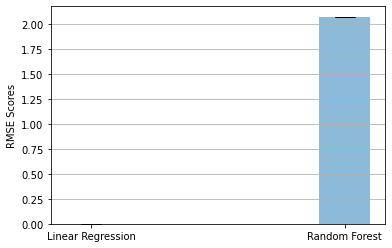

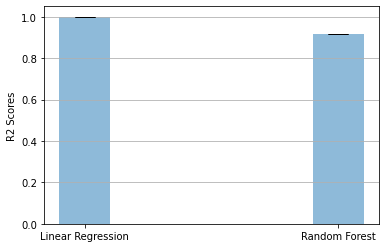

In [4]:
# plot for rmse

models = ['Linear Regression', 'Random Forest']
x_pos = np.arange(len(models))
CTEs =  q['rmse']['mean'] , w['rmse']['mean']
error = q['rmse']['std']  , w['rmse']['std']

fig, ax = plt.subplots()

ax.bar(x_pos, CTEs, yerr=error, align='center', alpha=0.5, ecolor='black', capsize=10,width = 0.2)
ax.set_ylabel('RMSE Scores')
ax.set_xticks(x_pos)
ax.set_xticklabels(models)

ax.yaxis.grid(True)

# plot for r2

models = ['Linear Regression', 'Random Forest']
x_pos = np.arange(len(models))
CTEs = q['r2']['mean'] , w['r2']['mean']
error = q['r2']['std']  , w['r2']['std']

fig, ax = plt.subplots()

ax.bar(x_pos, CTEs, yerr=error, align='center', alpha=0.5, ecolor='black', capsize=10,width = 0.2)
ax.set_ylabel('R2 Scores')
ax.set_xticks(x_pos)
ax.set_xticklabels(models)

ax.yaxis.grid(True)


In [5]:
# For non-linear data
def data_for_non_linear_relationship():
    data = {}
    for i in range(0,4):
        mean = random.randint(5,10)
        data[i] = np.random.normal(mean, 1, size=100)
    dataset_2 = pd.DataFrame(data)
    dataset_2['y'] = 2 * dataset_2[0] + 3 * ((dataset_2[1]) ** 3) - 5 * ((dataset_2[2]) ** 2) + 1*dataset_2[3]
    return dataset_2


# Linear Regression

def linear_regression_for_non_linear(dataset):

    train_split, validation_split = train_test_split(dataset, test_size=0.2, random_state=123)
    x = train_split.drop('y', axis=1)
    y = train_split['y']
    regr = linear_model.LinearRegression().fit(x,y)
    regr.score(x,y)

    validation_x = validation_split.drop(['y'], axis=1)
    validation_y = validation_split['y']
    regr.predict(validation_x)

    pred_df3 = pd.DataFrame(zip(regr.predict(validation_x), validation_y))
    pred_df3.columns=['predicted_values' , 'true_values']

    mse = mean_squared_error(pred_df3['true_values'],pred_df3['predicted_values'])
    RMSE = math.sqrt(mse)
    r2 = r2_score(pred_df3['true_values'],pred_df3['predicted_values'])
    return RMSE,r2

def mean_std_of_scores_linear_regression_for_non_linear(number_of_iterations,dataset):
    data_mean_std_rmse_r2 = {}

    mean_std_rmse = []
    mean_std_r2 = []
    for i in range(number_of_iterations):
        Rmse,r2 = linear_regression_for_non_linear(dataset)
        mean_std_rmse.append(Rmse)
        mean_std_r2.append(r2)

    data_mean_std_rmse_r2['rmse'] = {'mean': np.mean(mean_std_rmse), 'std': np.std(mean_std_rmse)}
    data_mean_std_rmse_r2['r2'] = {'mean': np.mean(mean_std_r2), 'std': np.std(mean_std_r2)}
    print(data_mean_std_rmse_r2)
    return data_mean_std_rmse_r2

# Random Forest
def random_forest_for_non_linear(dataset):
    X = dataset.iloc[:, 0:4].values
    y = dataset.iloc[:, 4].values

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

    regressor = RandomForestRegressor(n_estimators=200, random_state=0)
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)

    pred_df4 = pd.DataFrame(zip(y_pred, y_test))
    pred_df4.columns=['predicted_values' , 'true_values']

    mse = mean_squared_error(pred_df4['predicted_values'],pred_df4['true_values'])
    RMSE = math.sqrt(mse)
    r2 = r2_score(pred_df4['true_values'],pred_df4['predicted_values'])
    return RMSE,r2

def mean_std_of_scores_random_forest_for_non_linear(number_of_iterations,dataset):
    data_mean_std_rmse_r2 = {}

    mean_std_rmse = []
    mean_std_r2 = []
    for i in range(number_of_iterations):
        Rmse,r2 = random_forest_for_non_linear(dataset)
        mean_std_rmse.append(Rmse)
        mean_std_r2.append(r2)

    data_mean_std_rmse_r2['rmse'] = {'mean': np.mean(mean_std_rmse), 'std': np.std(mean_std_rmse)}
    data_mean_std_rmse_r2['r2'] = {'mean': np.mean(mean_std_r2), 'std': np.std(mean_std_r2)}
    print(data_mean_std_rmse_r2)
    return data_mean_std_rmse_r2

In [6]:
data = data_for_non_linear_relationship()
s = mean_std_of_scores_linear_regression_for_non_linear(3,data)
d = mean_std_of_scores_random_forest_for_non_linear(3,data)

{'rmse': {'mean': 63.59506007404335, 'std': 7.105427357601002e-15}, 'r2': {'mean': 0.9822044536235538, 'std': 1.1102230246251565e-16}}
{'rmse': {'mean': 268.4285258738871, 'std': 0.0}, 'r2': {'mean': 0.8556762912404615, 'std': 0.0}}


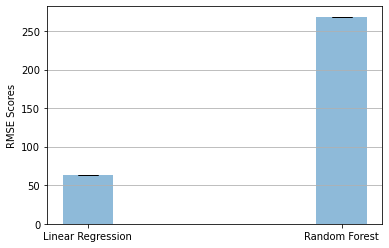

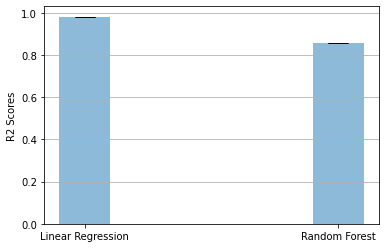

In [7]:
# plot for rmse

models = ['Linear Regression', 'Random Forest']
x_pos = np.arange(len(models))
CTEs =  s['rmse']['mean'] , d['rmse']['mean']
error = s['rmse']['std']  , d['rmse']['std']

fig, ax = plt.subplots()

ax.bar(x_pos, CTEs, yerr=error, align='center', alpha=0.5, ecolor='black', capsize=10,width = 0.2)
ax.set_ylabel('RMSE Scores')
ax.set_xticks(x_pos)
ax.set_xticklabels(models)

ax.yaxis.grid(True)

# plot for r2

models = ['Linear Regression', 'Random Forest']
x_pos = np.arange(len(models))
CTEs = s['r2']['mean'] , d['r2']['mean']
error = s['r2']['std']  , d['r2']['std']

fig, ax = plt.subplots()

ax.bar(x_pos, CTEs, yerr=error, align='center', alpha=0.5, ecolor='black', capsize=10,width = 0.2)
ax.set_ylabel('R2 Scores')
ax.set_xticks(x_pos)
ax.set_xticklabels(models)

ax.yaxis.grid(True)



In [8]:
# For non-linear data with polynomial features
def data_for_non_linear_relationship_poly_feat():
    data = {}
    for i in range(0,4):
        mean = random.randint(5,10)
        data[i] = np.random.normal(mean, 1, size=100)
    dataset_2 = pd.DataFrame(data)
    dataset_2['x5'] =  dataset_2[1] ** 3
    dataset_2['x6'] = dataset_2[2] ** 2
    dataset_2['y'] = 2 * dataset_2[0] + 3 * ((dataset_2[1]) ** 3) - 5 * ((dataset_2[2]) ** 2) + 1*dataset_2[3]
    return dataset_2


# Linear Regression

def linear_regression_for_non_linear(dataset):

    train_split, validation_split = train_test_split(dataset, test_size=0.2, random_state=123)
    x = train_split.drop('y', axis=1)
    y = train_split['y']
    regr = linear_model.LinearRegression().fit(x,y)
    regr.score(x,y)

    validation_x = validation_split.drop(['y'], axis=1)
    validation_y = validation_split['y']
    regr.predict(validation_x)

    pred_df3 = pd.DataFrame(zip(regr.predict(validation_x), validation_y))
    pred_df3.columns=['predicted_values' , 'true_values']

    mse = mean_squared_error(pred_df3['true_values'],pred_df3['predicted_values'])
    RMSE = math.sqrt(mse)
    r2 = r2_score(pred_df3['true_values'],pred_df3['predicted_values'])
    return RMSE,r2

def mean_std_of_scores_linear_regression_for_non_linear(number_of_iterations,dataset):
    data_mean_std_rmse_r2 = {}

    mean_std_rmse = []
    mean_std_r2 = []
    for i in range(number_of_iterations):
        Rmse,r2 = linear_regression_for_non_linear(dataset)
        mean_std_rmse.append(Rmse)
        mean_std_r2.append(r2)

    data_mean_std_rmse_r2['rmse'] = {'mean': np.mean(mean_std_rmse), 'std': np.std(mean_std_rmse)}
    data_mean_std_rmse_r2['r2'] = {'mean': np.mean(mean_std_r2), 'std': np.std(mean_std_r2)}
    print(data_mean_std_rmse_r2)
    return data_mean_std_rmse_r2

# Random Forest
def random_forest_for_non_linear(dataset):
    X = dataset.iloc[:, 0:4].values
    y = dataset.iloc[:, 4].values

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

    regressor = RandomForestRegressor(n_estimators=200, random_state=0)
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)

    pred_df4 = pd.DataFrame(zip(y_pred, y_test))
    pred_df4.columns=['predicted_values' , 'true_values']

    mse = mean_squared_error(pred_df4['predicted_values'],pred_df4['true_values'])
    RMSE = math.sqrt(mse)
    r2 = r2_score(pred_df4['true_values'],pred_df4['predicted_values'])
    return RMSE,r2

def mean_std_of_scores_random_forest_for_non_linear(number_of_iterations,dataset):
    data_mean_std_rmse_r2 = {}

    mean_std_rmse = []
    mean_std_r2 = []
    for i in range(number_of_iterations):
        Rmse,r2 = random_forest_for_non_linear(dataset)
        mean_std_rmse.append(Rmse)
        mean_std_r2.append(r2)

    data_mean_std_rmse_r2['rmse'] = {'mean': np.mean(mean_std_rmse), 'std': np.std(mean_std_rmse)}
    data_mean_std_rmse_r2['r2'] = {'mean': np.mean(mean_std_r2), 'std': np.std(mean_std_r2)}
    print(data_mean_std_rmse_r2)
    return data_mean_std_rmse_r2

In [9]:
data = data_for_non_linear_relationship_poly_feat()
g = mean_std_of_scores_linear_regression_for_non_linear(3,data)
j = mean_std_of_scores_random_forest_for_non_linear(3,data)

{'rmse': {'mean': 1.7743839877674968e-13, 'std': 0.0}, 'r2': {'mean': 1.0, 'std': 0.0}}
{'rmse': {'mean': 2.5669127761407577, 'std': 0.0}, 'r2': {'mean': 0.9979659208241385, 'std': 0.0}}


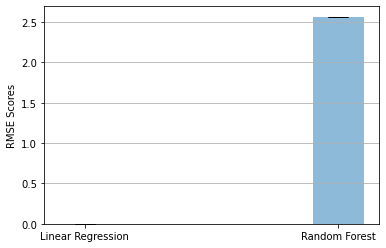

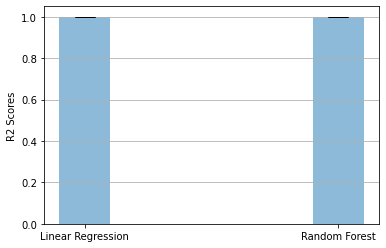

In [10]:
# plot for rmse

models = ['Linear Regression', 'Random Forest']
x_pos = np.arange(len(models))
CTEs =  g['rmse']['mean'] , j['rmse']['mean']
error = g['rmse']['std']  , j['rmse']['std']

fig, ax = plt.subplots()

ax.bar(x_pos, CTEs, yerr=error, align='center', alpha=0.5, ecolor='black', capsize=10,width = 0.2)
ax.set_ylabel('RMSE Scores')
ax.set_xticks(x_pos)
ax.set_xticklabels(models)

ax.yaxis.grid(True)

# plot for r2

models = ['Linear Regression', 'Random Forest']
x_pos = np.arange(len(models))
CTEs = g['r2']['mean'] , j['r2']['mean']
error = g['r2']['std']  , j['r2']['std']

fig, ax = plt.subplots()

ax.bar(x_pos, CTEs, yerr=error, align='center', alpha=0.5, ecolor='black', capsize=10,width = 0.2)
ax.set_ylabel('R2 Scores')
ax.set_xticks(x_pos)
ax.set_xticklabels(models)

ax.yaxis.grid(True)

In [11]:
# for sparse signal

def data_for_sparse_signal():
    data = {}
    for i in range(0,10000):
        mean = random.randint(5,10)
        data[i] = np.random.normal(mean, 1, size=100)
    dataset_2 = pd.DataFrame(data)
    dataset_2['y'] = 2 * dataset_2[0] + 3 * dataset_2[1]
    return dataset_2

def linear_regression_for_sparse(dataset):

    train_split, validation_split = train_test_split(dataset, test_size=0.2, random_state=123)
    x = train_split.drop('y', axis=1)
    y = train_split['y']
    regr = linear_model.LinearRegression().fit(x,y)
    regr.score(x,y)

    validation_x = validation_split.drop(['y'], axis=1)
    validation_y = validation_split['y']
    regr.predict(validation_x)

    pred_df3 = pd.DataFrame(zip(regr.predict(validation_x), validation_y))
    pred_df3.columns=['predicted_values' , 'true_values']

    mse = mean_squared_error(pred_df3['true_values'],pred_df3['predicted_values'])
    RMSE = math.sqrt(mse)
    r2 = r2_score(pred_df3['true_values'],pred_df3['predicted_values'])
    return RMSE,r2

def mean_std_of_scores_linear_regression_for_sparse_signal(number_of_iterations,dataset):
    data_mean_std_rmse_r2 = {}

    mean_std_rmse = []
    mean_std_r2 = []
    for i in range(number_of_iterations):
        Rmse,r2 = linear_regression_for_sparse(dataset)
        mean_std_rmse.append(Rmse)
        mean_std_r2.append(r2)

    data_mean_std_rmse_r2['rmse'] = {'mean': np.mean(mean_std_rmse), 'std': np.std(mean_std_rmse)}
    data_mean_std_rmse_r2['r2'] = {'mean': np.mean(mean_std_r2), 'std': np.std(mean_std_r2)}
    print(data_mean_std_rmse_r2)
    return data_mean_std_rmse_r2

# Random Forest
def random_forest_for_sparse_signal(dataset):
    X = dataset.iloc[:, 0:4].values
    y = dataset.iloc[:, 4].values

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

    regressor = RandomForestRegressor(n_estimators=200, random_state=0)
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)

    pred_df4 = pd.DataFrame(zip(y_pred, y_test))
    pred_df4.columns=['predicted_values' , 'true_values']

    mse = mean_squared_error(pred_df4['predicted_values'],pred_df4['true_values'])
    RMSE = math.sqrt(mse)
    r2 = r2_score(pred_df4['true_values'],pred_df4['predicted_values'])
    return RMSE,r2

def mean_std_of_scores_random_forest_for_sparse_signal(number_of_iterations,dataset):
    data_mean_std_rmse_r2 = {}

    mean_std_rmse = []
    mean_std_r2 = []
    for i in range(number_of_iterations):
        Rmse,r2 = random_forest_for_sparse_signal(dataset)
        mean_std_rmse.append(Rmse)
        mean_std_r2.append(r2)

    data_mean_std_rmse_r2['rmse'] = {'mean': np.mean(mean_std_rmse), 'std': np.std(mean_std_rmse)}
    data_mean_std_rmse_r2['r2'] = {'mean': np.mean(mean_std_r2), 'std': np.std(mean_std_r2)}
    print(data_mean_std_rmse_r2)
    return data_mean_std_rmse_r2



In [12]:
data = data_for_sparse_signal()
m = mean_std_of_scores_linear_regression_for_sparse_signal(3,data)
n = mean_std_of_scores_random_forest_for_sparse_signal(3,data)

{'rmse': {'mean': 3.3990626605389758, 'std': 4.440892098500626e-16}, 'r2': {'mean': 0.057157358740875686, 'std': 0.0}}
{'rmse': {'mean': 1.1792448141965648, 'std': 0.0}, 'r2': {'mean': -0.17400667755646815, 'std': 0.0}}


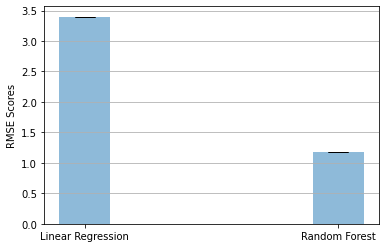

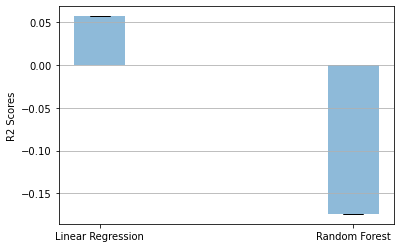

In [13]:
# plot for rmse

models = ['Linear Regression', 'Random Forest']
x_pos = np.arange(len(models))
CTEs =  m['rmse']['mean'] , n['rmse']['mean']
error = m['rmse']['std']  , n['rmse']['std']

fig, ax = plt.subplots()

ax.bar(x_pos, CTEs, yerr=error, align='center', alpha=0.5, ecolor='black', capsize=10,width = 0.2)
ax.set_ylabel('RMSE Scores')
ax.set_xticks(x_pos)
ax.set_xticklabels(models)

ax.yaxis.grid(True)

# plot for r2

models = ['Linear Regression', 'Random Forest']
x_pos = np.arange(len(models))
CTEs = m['r2']['mean'] , n['r2']['mean']
error = m['r2']['std']  , n['r2']['std']

fig, ax = plt.subplots()

ax.bar(x_pos, CTEs, yerr=error, align='center', alpha=0.5, ecolor='black', capsize=10,width = 0.2)
ax.set_ylabel('R2 Scores')
ax.set_xticks(x_pos)
ax.set_xticklabels(models)

ax.yaxis.grid(True)

In [14]:
# for sparse signal with reguralization
def data_for_sparse_signal_with_regularization():
    data = {}
    for i in range(0,10000):
        mean = random.randint(5,10)
        data[i] = np.random.normal(mean, 1, size=100)
    dataset_2 = pd.DataFrame(data)
    dataset_2['y'] = 2 * dataset_2[0] + 3 * dataset_2[1]
    return dataset_2

def reguralization(dataset):
    train_split, validation_split = train_test_split(dataset, test_size=0.2, random_state=123)
    x = train_split.drop('y', axis=1)
    y = train_split['y']
    lasso = Lasso(alpha=0.01)
    lasso.fit(x, y)

    lasso.score(x,y)


    validation_x = validation_split.drop(['y'], axis=1)
    validation_y = validation_split['y']
    lasso.fit(validation_x,validation_y)
    lasso.score(validation_x,validation_y)
    lasso.predict(validation_x)

    pred_df3 = pd.DataFrame(zip(lasso.predict(validation_x), validation_y))
    pred_df3.columns=['predicted_values' , 'true_values']

    mse = mean_squared_error(pred_df3['true_values'],pred_df3['predicted_values'])
    RMSE = math.sqrt(mse)
    r2 = r2_score(pred_df3['true_values'],pred_df3['predicted_values'])
    return RMSE,r2

def mean_std_of_scores_linear_regression_for_sparse_signal_with_reguralization(number_of_iterations,dataset):
    data_mean_std_rmse_r2 = {}

    mean_std_rmse = []
    mean_std_r2 = []
    for i in range(number_of_iterations):
        Rmse,r2 = reguralization(dataset)
        mean_std_rmse.append(Rmse)
        mean_std_r2.append(r2)

    data_mean_std_rmse_r2['rmse'] = {'mean': np.mean(mean_std_rmse), 'std': np.std(mean_std_rmse)}
    data_mean_std_rmse_r2['r2'] = {'mean': np.mean(mean_std_r2), 'std': np.std(mean_std_r2)}
    print(data_mean_std_rmse_r2)
    return data_mean_std_rmse_r2

In [15]:
data = data_for_sparse_signal()
m = mean_std_of_scores_linear_regression_for_sparse_signal_with_reguralization(3,data)


C:\Users\sowgu\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0513971940595007, tolerance: 0.019544050206551828
  model = cd_fast.enet_coordinate_descent(
C:\Users\sowgu\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0513971940595007, tolerance: 0.019544050206551828
  model = cd_fast.enet_coordinate_descent(
C:\Users\sowgu\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0513971940595007, tolerance: 0.019544050206551828
  model = cd_fast.enet_coordinate_descent(


{'rmse': {'mean': 0.014030151377915403, 'std': 0.0}, 'r2': {'mean': 0.9999798562584923, 'std': 0.0}}


<Figure size 800x300 with 0 Axes>

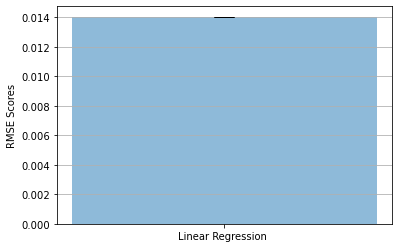

<Figure size 300x300 with 0 Axes>

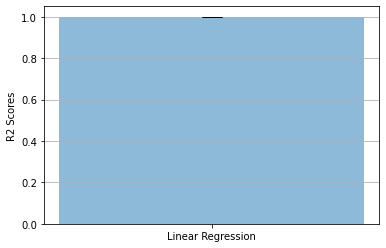

In [17]:
# plot for rmse

models = ['Linear Regression ']
x_pos = np.arange(len(models))
CTEs =  m['rmse']['mean']
error = m['rmse']['std']
figure(figsize=(8, 3), dpi=100)
fig, ax = plt.subplots()

ax.bar(x_pos, CTEs, yerr=error, align='center', alpha=0.5, ecolor='black', capsize=10,width = 0.2 )
ax.set_ylabel('RMSE Scores')

ax.set_xticks(x_pos)
ax.set_xticklabels(models)

ax.yaxis.grid(True)

# plot for r2

models = ['Linear Regression']
x_pos = np.arange(len(models))
CTEs = m['r2']['mean']
error = m['r2']['std']
figure(figsize=(3, 3), dpi=100)
fig, ax = plt.subplots()

ax.bar(x_pos, CTEs, yerr=error, align='center', alpha=0.5, ecolor='black', capsize=10,width = 0.1)
ax.set_ylabel('R2 Scores')
ax.set_xticks(x_pos)
ax.set_xticklabels(models)

ax.yaxis.grid(True)

In [764]:
# Distributional shifts

def data_for_distributional_shifts():
    data = {}
    means= range(5,9)
    for j in range(len(means)):
        data[j] = np.random.normal(means[j], 1, size=100)
    dataset_2 = pd.DataFrame(data)
    dataset_2['y'] = 5 * dataset_2[0] - 3 * dataset_2[1] + 1.5 * dataset_2[2] + 50 * dataset_2[3] + np.random.normal(2,1)
    return dataset_2

def new_test_data_for_distributional_shifts():
    data_new = {}
    means= range(5,9)
    for j in range(len(means)):
        data_new[j] = np.random.normal(means[j], 1, size=100)
    dataset_new = pd.DataFrame(data_new)
    dataset_new['y'] = 3 * dataset_new[0] - 1 * dataset_new[1] + 3.5 * dataset_new[2] + 30 * dataset_new[3] + np.random.normal(2,1)
    return dataset_new


def linear_regression_for_distributional_shifts(dataset,new_test_data):

    train_split, validation_split = train_test_split(dataset, test_size=0.2, random_state=123)
    x = train_split.drop('y', axis=1)
    y = train_split['y']
    regr = linear_model.LinearRegression().fit(x,y)


    validation_x = validation_split.drop(['y'], axis=1)
    validation_y = validation_split['y']
    regr.predict(validation_x)
   # print(regr.coef_)
    new_test_data_x = new_test_data.drop(['y'],axis=1)
    new_test_data_y = new_test_data['y']



    #


    pred_df3 = pd.DataFrame(zip(regr.predict(new_test_data_x), new_test_data_y))
    pred_df3.columns=['predicted_values' , 'true_values']
    #print(pred_df3)
    mse = mean_squared_error(pred_df3['true_values'],pred_df3['predicted_values'])
    RMSE = math.sqrt(mse)
    r2 = r2_score(pred_df3['true_values'],pred_df3['predicted_values'])
    return RMSE,r2

def mean_std_of_scores_linear_regression_for_distributional_shifts(number_of_iterations,dataset,new_test_data):
    data_mean_std_rmse_r2 = {}

    mean_std_rmse = []
    mean_std_r2 = []
    for i in range(number_of_iterations):
        Rmse,r2 = linear_regression_for_distributional_shifts(dataset,new_test_data)
        mean_std_rmse.append(Rmse)
        mean_std_r2.append(r2)

    data_mean_std_rmse_r2['rmse'] = {'mean': np.mean(mean_std_rmse), 'std': np.std(mean_std_rmse)}
    data_mean_std_rmse_r2['r2'] = {'mean': np.mean(mean_std_r2), 'std': np.std(mean_std_r2)}
    print(data_mean_std_rmse_r2)
    return data_mean_std_rmse_r2

# Random Forest
def random_forest_for_distributional_shifts(dataset,new_test_data):
    X = dataset.iloc[:, 0:4].values
    y = dataset.iloc[:, 4].values

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

    regressor = RandomForestRegressor(n_estimators=200, random_state=0)
    regressor.fit(X_train, y_train)

    new_test_data_x = new_test_data.drop(['y'],axis=1)
    new_test_data_y = new_test_data['y']

    y_pred = regressor.predict(new_test_data_x)

    pred_df4 = pd.DataFrame(zip(y_pred, new_test_data_y))
    pred_df4.columns=['predicted_values' , 'true_values']

    mse = mean_squared_error(pred_df4['predicted_values'],pred_df4['true_values'])
    RMSE = math.sqrt(mse)
    r2 = r2_score(pred_df4['true_values'],pred_df4['predicted_values'])
    return RMSE,r2

def mean_std_of_scores_random_forest_for_distributional_shifts(number_of_iterations,dataset,new_test_data):
    data_mean_std_rmse_r2 = {}

    mean_std_rmse = []
    mean_std_r2 = []
    for i in range(number_of_iterations):
        Rmse,r2 = random_forest_for_distributional_shifts(dataset,new_test_data)
        mean_std_rmse.append(Rmse)
        mean_std_r2.append(r2)

    data_mean_std_rmse_r2['rmse'] = {'mean': np.mean(mean_std_rmse), 'std': np.std(mean_std_rmse)}
    data_mean_std_rmse_r2['r2'] = {'mean': np.mean(mean_std_r2), 'std': np.std(mean_std_r2)}
    print(data_mean_std_rmse_r2)
    return data_mean_std_rmse_r2



In [765]:
data_distribution_shifts = data_for_distributional_shifts()
test_data=new_test_data_for_distributional_shifts()
f = mean_std_of_scores_linear_regression_for_distributional_shifts(3,data_distribution_shifts,test_data)
h = mean_std_of_scores_random_forest_for_distributional_shifts(3,data_distribution_shifts,test_data)

{'rmse': {'mean': 145.74761212178527, 'std': 0.0}, 'r2': {'mean': -21.489307558216236, 'std': 0.0}}
{'rmse': {'mean': 144.57572591744528, 'std': 0.0}, 'r2': {'mean': -21.12911015480306, 'std': 0.0}}


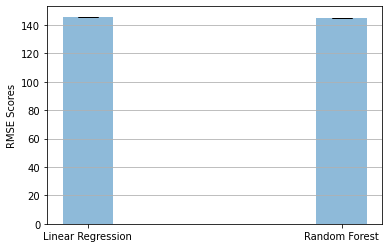

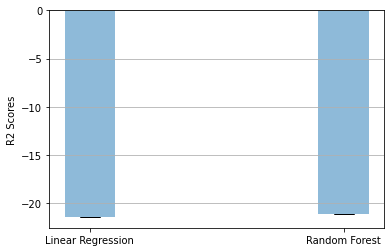

In [766]:
# plot for rmse

models = ['Linear Regression', 'Random Forest']
x_pos = np.arange(len(models))
CTEs =  f['rmse']['mean'] , h['rmse']['mean']
error = f['rmse']['std']  , h['rmse']['std']

fig, ax = plt.subplots()

ax.bar(x_pos, CTEs, yerr=error, align='center', alpha=0.5, ecolor='black', capsize=10,width = 0.2)
ax.set_ylabel('RMSE Scores')
ax.set_xticks(x_pos)
ax.set_xticklabels(models)

ax.yaxis.grid(True)

# plot for r2

models = ['Linear Regression', 'Random Forest']
x_pos = np.arange(len(models))
CTEs = f['r2']['mean'] , h['r2']['mean']
error = f['r2']['std']  , h['r2']['std']

fig, ax = plt.subplots()

ax.bar(x_pos, CTEs, yerr=error, align='center', alpha=0.5, ecolor='black', capsize=10,width = 0.2)
ax.set_ylabel('R2 Scores')
ax.set_xticks(x_pos)
ax.set_xticklabels(models)

ax.yaxis.grid(True)

In [ ]:
# For imbalanced data